# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

from os.path import exists

# set diagram sizes
# print(plt.rcParams['figure.dpi'])  # default = 72
# print(plt.rcParams['figure.figsize'])  # default = 6.0, 4.0
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12.0, 4.0]

Les données sont disponibles sur le site Web de l'[institut Scripps. ](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html)

In [14]:
filename = "co2_file.csv"
if not exists(filename):
    # récolte le 12/02
    data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
    data = pd.read_csv(data_url, encoding = 'utf-8', comment='"', names=["date", "value"])
    data.to_csv(filename, index=False)
else:
    data = pd.read_csv(filename, encoding = 'utf-8', comment='"')

data.head(5)

date   value
0  1958-03-29  316.19
1  1958-04-05  317.31
2  1958-04-12  317.69
3  1958-04-19  317.58
4  1958-04-26  316.48

## Contrôle Qualité
### Recherche des lignes sans donnée

In [15]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [date, value]
Index: []

Il n'y a pas de date sans mesure.

### Vérification des écarts entre les données
On attend un écart de 7 jours entre chaque mesure.

In [16]:
data['timestamp'] = pd.to_datetime(data['date'])
sorted_data = data.set_index('timestamp').sort_index()
sorted_data.head(3)

date   value
timestamp                     
1958-03-29  1958-03-29  316.19
1958-04-05  1958-04-05  317.31
1958-04-12  1958-04-12  317.69

In [17]:
timestamp = sorted_data.index
for t1, t2 in zip(timestamp[:-1], timestamp[1:]):
    delta = t2 - t1
    # print(delta)
    if delta > pd.Timedelta('7d'):
        print(f"[{t1},{t2}] => {delta}")

[1958-05-03 00:00:00,1958-05-17 00:00:00] => 14 days 00:00:00
[1958-05-24 00:00:00,1958-07-05 00:00:00] => 42 days 00:00:00
[1958-08-16 00:00:00,1958-08-30 00:00:00] => 14 days 00:00:00
[1958-09-06 00:00:00,1958-11-08 00:00:00] => 63 days 00:00:00
[1959-01-31 00:00:00,1959-02-14 00:00:00] => 14 days 00:00:00
[1959-03-07 00:00:00,1959-03-21 00:00:00] => 14 days 00:00:00
[1959-05-23 00:00:00,1959-06-06 00:00:00] => 14 days 00:00:00
[1959-08-08 00:00:00,1959-08-22 00:00:00] => 14 days 00:00:00
[1962-08-18 00:00:00,1962-09-15 00:00:00] => 28 days 00:00:00
[1962-12-22 00:00:00,1963-01-05 00:00:00] => 14 days 00:00:00
[1963-02-09 00:00:00,1963-02-23 00:00:00] => 14 days 00:00:00
[1963-04-27 00:00:00,1963-05-11 00:00:00] => 14 days 00:00:00
[1963-11-16 00:00:00,1963-11-30 00:00:00] => 14 days 00:00:00
[1964-01-18 00:00:00,1964-05-30 00:00:00] => 133 days 00:00:00
[1964-06-06 00:00:00,1964-06-27 00:00:00] => 21 days 00:00:00
[1964-08-01 00:00:00,1964-08-15 00:00:00] => 14 days 00:00:00
[1966-0

Il y avait de nombreuses données manquantes, la plupart de une à 2 mesures consécutives.

### Analyse visuelle

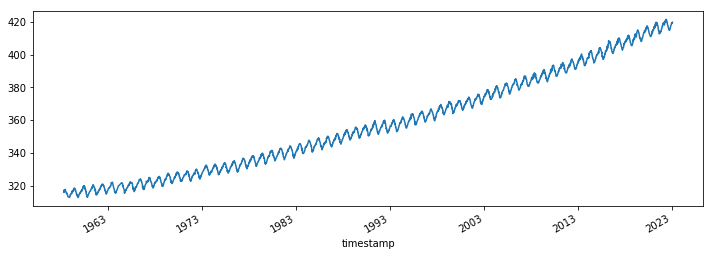

In [18]:
sorted_data['value'].plot()

On a un signal oscillant/pulsatil, mais toujours croissant.

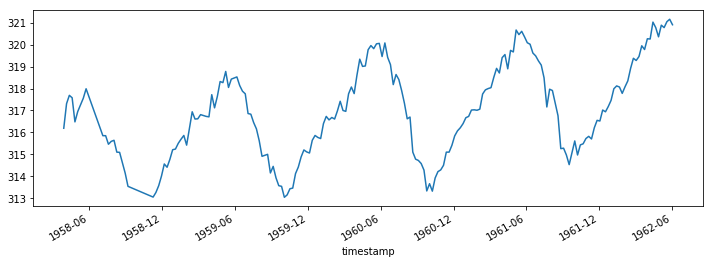

In [19]:
sorted_data['value'][:200].plot()

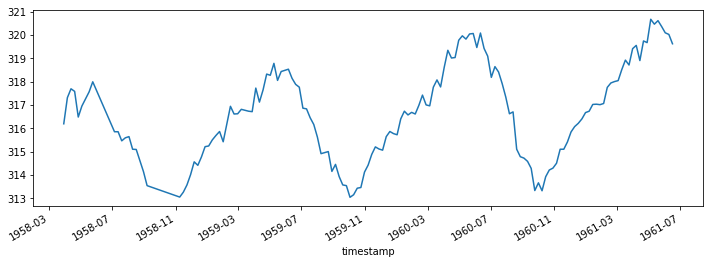

In [20]:
sorted_data['value'][:150].plot()

La période du signal semble annuel, avec un pic vers le mois de juin et le plus bas vers octobre-novembre.

## Analyse
Pour se protéger du bruit, on va réaliser une moyenne glissante
### Analyse de la pulsation
Les systèmes oscillants peuvent être caractérisés par une fréquence de pulsation et une amplitude du système.
### Analyse globale : évolution de la concentration dans le temps

In [28]:
print( timestamp[0] )
x_lissé = pd.date_range(timestamp[0], timestamp[-1], freq='W')
print(x_lissé)

1958-03-29 00:00:00
DatetimeIndex(['1958-03-30', '1958-04-06', '1958-04-13', '1958-04-20',
               '1958-04-27', '1958-05-04', '1958-05-11', '1958-05-18',
               '1958-05-25', '1958-06-01',
               ...
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
               '2022-12-18', '2022-12-25', '2023-01-01', '2023-01-08',
               '2023-01-15', '2023-01-22'],
              dtype='datetime64[ns]', length=3383, freq='W-SUN')
